# Coffee Roasting Deep Learning Model

The Coffee Roasting Deep Learning Model project aims to revolutionize the traditional coffee roasting process using advanced machine learning techniques. Coffee roasting is a critical stage in coffee production, where precise control over temperature and time significantly impacts the flavor and quality of the final product. Traditional methods rely heavily on the experience and intuition of the roaster, making it challenging to achieve consistent results.

This project leverages deep learning to create a model that can predict the optimal roasting profile for different types of coffee beans. By analyzing historical roasting data, including temperature curves, roast duration, and bean characteristics, the model can learn patterns and make precise predictions.

The process begins with data collection, where various parameters from previous roasting sessions are gathered. Next, the data is normalized to ensure uniformity, and data augmentation techniques are applied to expand the dataset, enhancing the model's learning capabilities. The core of the project involves building a neural network, specifically designed for coffee roasting, with multiple layers and activation functions to capture complex patterns in the data.

After training the model using a portion of the dataset, it is validated and tested to ensure accuracy and reliability. Once trained, the model can be deployed to provide real-time recommendations for adjusting roasting parameters, thereby improving consistency and quality.

This innovative approach not only automates the coffee roasting process but also allows for greater experimentation and optimization, leading to superior coffee quality. By integrating deep learning, this project aims to set new standards in the coffee industry, ensuring every cup delivers the best possible flavor.

<div style="text-align: center;">
    <img src="images/Coffe.jpg" style="width:650px;height:550px;">
</div>


# 1. Import Packages

Install all packages that we need.

In [31]:
# !pip install ipywidgets matplotlib numpy tensorflow

In this section we import every packages that we need in this project.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 2. Data collection
This section details the methods and sources used for collecting data on coffee roasting. It explains what data is needed and how it was gathered.

In [47]:
def load_coffee_data():
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))
    
    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1,1))


In [48]:
X, Y = load_coffee_data();
print(X.shape, Y.shape)
print(X)
print(Y)

(200, 2) (200, 1)
[[185.31763812  12.69396457]
 [259.92047498  11.86766377]
 [231.01357101  14.41424211]
 [175.3666449   11.72058651]
 [187.12086467  14.12973206]
 [225.90586448  12.10024905]
 [208.40515676  14.17718919]
 [207.07593089  14.0327376 ]
 [280.60385359  14.23225929]
 [202.86935247  12.24901028]
 [196.70468985  13.54426389]
 [270.31327028  14.60225577]
 [192.94979108  15.19686759]
 [213.57283453  14.27503537]
 [164.47298664  11.91817423]
 [177.25750542  15.03779869]
 [241.7745473   14.89694529]
 [236.99889634  13.12616959]
 [219.73805621  13.87377407]
 [266.38592796  13.25274466]
 [270.45241485  13.95486775]
 [261.96307698  13.49222422]
 [243.4899478   12.8561015 ]
 [220.58184803  12.36489356]
 [163.59498627  11.65441652]
 [244.76317931  13.32572248]
 [271.19410986  14.84073282]
 [201.98784315  15.39471508]
 [229.9283715   14.56353326]
 [204.97123839  12.28467965]
 [173.18989704  12.2248249 ]
 [231.51374483  11.95053142]
 [152.68795109  14.83198786]
 [163.42050092  13.302338

# 3. Data Preprocessing
This section covers the steps taken to clean and prepare the data for analysis. It includes handling missing values, normalizing data, and any other preprocessing steps necessary to ensure the data is ready for deep learning.

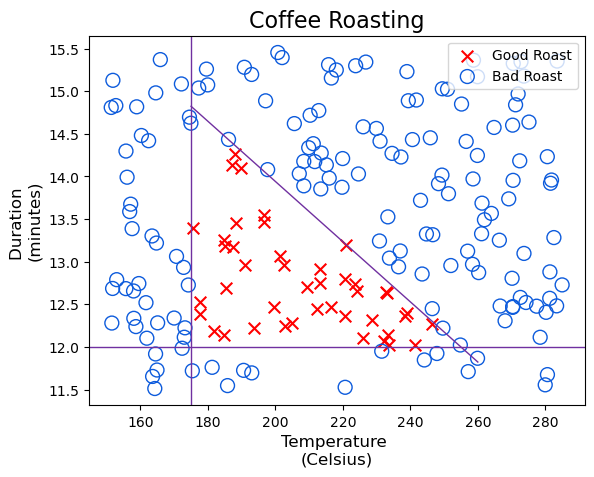

In [49]:
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0', dldarkblue =  '#0D5BDC')
def plotData(X, Y):
    Y = Y.reshape(-1,)
    colormap = np.array(['r', 'b'])
    fig, ax = plt.subplots(1,1,)
    ax.scatter(X[Y==1,0],X[Y==1,1], s=70, marker='x', c='red', label="Good Roast" )
    ax.scatter(X[Y==0,0],X[Y==0,1], s=100, marker='o', facecolors='none', 
                   edgecolors=dlc["dldarkblue"],linewidth=1,  label="Bad Roast")
    tr = np.linspace(175,260,50)
    ax.plot(tr, (-3/85) * tr + 21, color=dlc["dlpurple"],linewidth=1)
    ax.axhline(y=12,color=dlc["dlpurple"],linewidth=1)
    ax.axvline(x=175,color=dlc["dlpurple"],linewidth=1)
    ax.set_title(f"Coffee Roasting", size=16)
    ax.set_xlabel("Temperature \n(Celsius)",size=12)
    ax.set_ylabel("Duration \n(minutes)",size=12)
    ax.legend(loc='upper right')
    plt.show()
plotData(X, Y)

# 4. Data Normalization

<div style="text-align: center;">
    <img src="images/Data_Normalization.jpg" style="width:650px;height:400px;">
</div>


Fitting the model's weights to the data (a process known as back-propagation, which will be covered in next week's lectures) is more efficient if the data is normalized. This is the same procedure used in Course 1, where features in the data are each normalized to have a similar range.

The procedure below uses a Keras [Normalization Layer](https://keras.io/api/layers/preprocessing_layers/numerical/normalization/). The steps involved are:

1. **Create a Normalization Layer**: This layer is not part of the model architecture but is used to preprocess the data.
2. **Adapt the Data**: The normalization layer learns the mean and variance of the dataset and stores these values internally.
3. **Normalize the Data**: The data is transformed based on the learned mean and variance.

It is crucial to apply the same normalization to any future data that uses the learned model to ensure consistency and accuracy.

In [64]:
print(f"Temperature Max, Min befor normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min befor normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.experimental.preprocessing.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
X_norm = norm_l(X)
print(f"Temperature Max, Min after normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min after normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min befor normalization: 284.99, 151.32
Duration    Max, Min befor normalization: 15.45, 11.51
Temperature Max, Min after normalization: 1.66, -1.69
Duration    Max, Min after normalization: 1.79, -1.70


# 5. Data Augmentation

<div style="text-align: center;">
    <img src="images/Data_Augmentation.jpg" style="width:650px;height:400px;">
</div>


To enhance the training process, we can tile (or duplicate) our data to increase the training set size. This augmentation helps in improving the model's performance and can reduce the number of training epochs required. By expanding the dataset, the model is exposed to more variations of the data, which aids in better generalization and learning.

The steps involved in data augmentation are:

1. **Tile the Data**: Duplicate the dataset to artificially increase its size.
2. **Randomize the Data**: Shuffle the data to ensure the model sees different variations in each epoch.

By augmenting the data, we can effectively train the model more efficiently and achieve better performance with fewer training epochs.

In [51]:
X_traning = np.tile(X_norm,(1000,1))
Y_traning = np.tile(Y,(1000,1))   
print(Xt.shape, Yt.shape)   

(200000, 2) (200000, 1)


# 6. Tensorflow Model

### 6.1 Model

<div style="text-align: center;">
    <img src="images/Model.jpg" style="width:650px;height:400px;">
</div>


By using sigmoid activation functions, the network can learn non-linear relationships in the data, which is essential for accurately modeling the coffee roasting process.

In [52]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
     ]
)

<div style="text-align: center;">
    <img src="images/Notes_on_input.jpg" style="width:650px;height:400px;">
</div>


>**Note 1:** The `tf.keras.Input(shape=(2,))` specifies the expected shape of the input. This allows TensorFlow to size the weights and bias parameters at this point, which is useful when exploring TensorFlow models. In practice, this statement can be omitted, and TensorFlow will size the network parameters when the input data is specified in the `model.fit` statement.
>
>**Note 2:** Including the sigmoid activation in the final layer is not considered best practice. Instead, this should be accounted for in the loss function, which improves numerical stability. This concept will be described in more detail in a later lab.

The `model.summary()` function provides a description of the network architecture:

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 3)                 9         
_________________________________________________________________
layer2 (Dense)               (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [58]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ -0.1267323   14.29598    -11.096129  ]
 [ -8.916388    11.853633    -0.25224006]] 
b1(3,): [-11.162907    1.7599316 -12.097754 ]
W2(3, 1):
 [[-45.710297]
 [-42.94522 ]
 [-50.189865]] 
b2(1,): [26.144812]


### 6.2 Train the Model
- The `model.compile` statement defines the loss function and specifies the optimization algorithm to be used.
- The `model.fit` statement runs gradient descent and fits the model weights to the data.

In [59]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    X_training,Y_training,            
    epochs=10,
)

Epoch 1/10
6250/6250 [==============================] - 2s 365us/step - loss: 0.0016
Epoch 2/10
6250/6250 [==============================] - 2s 363us/step - loss: 0.0012
Epoch 3/10
6250/6250 [==============================] - 2s 361us/step - loss: 9.1039e-04
Epoch 4/10
6250/6250 [==============================] - 2s 365us/step - loss: 7.1239e-04
Epoch 5/10
6250/6250 [==============================] - 2s 362us/step - loss: 5.6308e-04
Epoch 6/10
6250/6250 [==============================] - 2s 371us/step - loss: 4.4542e-04
Epoch 7/10
6250/6250 [==============================] - 2s 378us/step - loss: 3.5220e-04
Epoch 8/10
6250/6250 [==============================] - 2s 366us/step - loss: 3.0394e-04
Epoch 9/10
6250/6250 [==============================] - 2s 362us/step - loss: 2.2889e-04
Epoch 10/10
6250/6250 [==============================] - 2s 376us/step - loss: 2.5902e-04


### 6.3 Updated Weights
After fitting, the weights have been updated: 

In [60]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ -0.2068252  16.477915  -12.206357 ]
 [ -9.502068   13.669212   -0.2753223]] 
b1: [-11.730425    2.3075454 -13.142027 ]
W2:
 [[-76.21513 ]
 [-65.998436]
 [-80.354034]] 
b2: [45.515884]


### 6.4 Predictions
Once you have a trained model, you can use it to make predictions. Recall that the output of our model is a probability. In this case, it represents the probability of a good roast. To make a decision, you must compare the probability to a threshold. In this case, we will use a threshold of 0.5.

<div style="text-align: center;">
    <img src="images/Creating_input.jpg" style="width:650px;height:400px;">
</div>

Let's start by creating the input data. The model expects one or more examples where examples are in the rows of the matrix. In this case, we have two features, so the matrix will be of shape (m, 2), where m is the number of examples.

Recall that we have normalized the input features, so we must normalize our test data as well.

To make a prediction, you apply the `predict` method.

In [61]:
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

predictions = 
 [[9.9951977e-01]
 [1.2472757e-09]]


In [63]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


<div style="text-align: center;">
    <img src="images/Prediction.jpg" style="width:650px;height:400px;">
</div>

To convert the probabilities to a decision, we apply a threshold:

In [128]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]
